In [1]:
#all imports go here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy
from scipy import stats
#from bioinfokit.analys import stat
#from statsmodels.graphics.factorplots import interaction_plot
#res=stat()
pd.set_option("display.max_rows",None)

In [2]:
#develop fake data
random.seed(50)
N = 50
a = [random.gauss(55,20) for x in range(N)]
b = [random.gauss(50,15) for x in range(N)]

Text(0.5, 1.0, 'Two-Sample T-test')

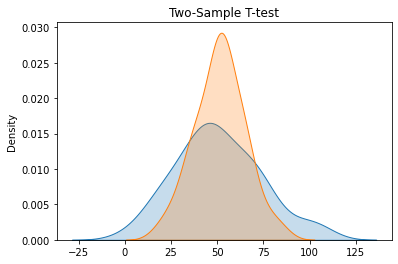

In [3]:
#visualizing
sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)
plt.title("Two-Sample T-test")

In [4]:
#2 sample t test or independent sample 
tStat, pValue = stats.ttest_ind(a, b, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.8521303420279133 T-Statistic:-0.18700897982039738


In [5]:
#1 sample t-test fake data
N = 30
a = [random.gauss(50,15) for x in range(N)]
popmean = 50.05

In [6]:
#1 sample t-test
tStat, pValue = scipy.stats.ttest_1samp(a, popmean, axis=0)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.40763145106167975 T-Statistic:0.840270325124658


In [7]:
#fake data for paired t test / related or repeated measures 
N = 30
a = [random.gauss(60,15) for x in range(N)]
b = [random.gauss(60,15) for x in range(N)]

In [8]:
tStat, pValue = scipy.stats.ttest_rel(a, b, axis=0)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.9563562606069607 T-Statistic:0.055201793284441816


In [9]:
datafile = "/Users/shionguha/Documents/GitHub/inf2178h-w22-exp-design-datascience/data/PlantGrowth.csv"

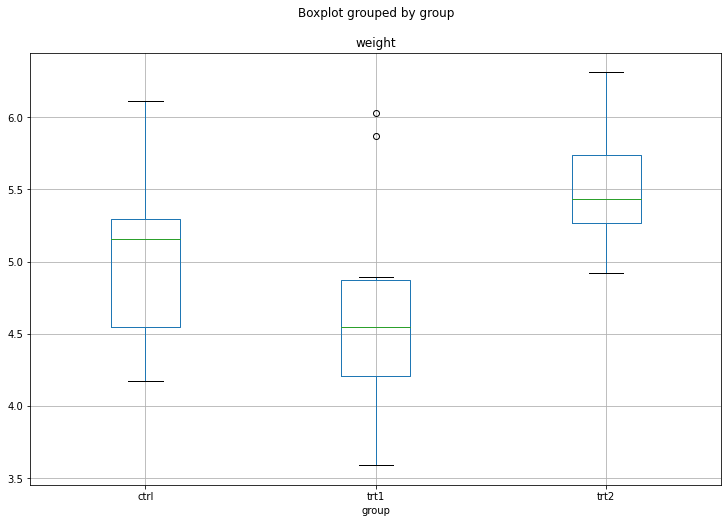

In [10]:
data = pd.read_csv(datafile)

#create boxplot
data.boxplot('weight', by='group',figsize=(12,8))

ctrl = data['weight'][data.group == 'ctrl']

grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] for grp in grps}

k = len(pd.unique(data.group))
N = len(data.values)
n = data.groupby('group').size()[0]

In [11]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('weight ~ group', data=data).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


In [12]:
#post hoc tests: tukey hsd
#tukey hsd with bonferroni's correction
pair_t = mod.t_test_pairwise('group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
trt1-ctrl,-0.371,0.278782,-1.330791,0.194388,-0.943013,0.201013,0.194388,False
trt2-ctrl,0.494,0.278782,1.771996,0.087682,-0.078013,1.066013,0.167675,False
trt2-trt1,0.865,0.278782,3.102787,0.004459,0.292987,1.437013,0.013318,True


In [13]:
import pingouin as pg

aov = pg.anova(data=data, dv='weight',between='group',detailed=True)

In [14]:
print(aov)

   Source        SS  DF        MS         F    p-unc       np2
0   group   3.76634   2  1.883170  4.846088  0.01591  0.264148
1  Within  10.49209  27  0.388596       NaN      NaN       NaN


In [15]:
#post hoc test with pingouin
#cohen = effect size
pt = pg.pairwise_tukey(dv='weight',between='group',effsize='cohen',data=data)
print(pt)

      A     B  mean(A)  mean(B)   diff        se         T   p-tukey     cohen
0  ctrl  trt1    5.032    4.661  0.371  0.278782  1.330791  0.390871  0.595148
1  ctrl  trt2    5.032    5.526 -0.494  0.278782 -1.771996  0.197996 -0.792461
2  trt1  trt2    4.661    5.526 -0.865  0.278782 -3.102787  0.012006 -1.387609


In [16]:
#ANOVA = systematic variance / unsystematic variance
#OR
#ANOVA = comparing proportion of variance explained between levels of cateogorical variables
#proportion of variance  = sum of squares
#SS_T = total sum of squares
#SS_T = SS_between + SS_within
#SS_between = SS_T - SS_within

In [17]:
#anything beyond a 1 way anova is called a factorial anova
#don't go beyond a 2 way anova.
#bias-variance tradeoff

d = pd.read_csv("/Users/shionguha/Documents/GitHub/inf2178h-w22-exp-design-datascience/data/twowayanova.txt", sep="\t")

d.head()

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95


In [18]:
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year','2_year','3_year'])

d_melt.columns = ['Genotype', 'years', 'value']

d_melt.head()

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


<AxesSubplot:xlabel='Genotype', ylabel='value'>

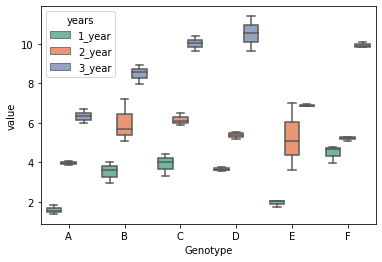

In [19]:
#exploratory data analysis
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set2")

In [20]:
#doing 2 way anovas with statsmodels
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


In [21]:
#bioinfokit
#res = stat()
#res.anova_stat(df=d_melt, res_var='value', anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
#res.anova_summary

In [22]:
#interaction plot
fig = interaction_plot(x=d_melt['Genotype'], trace=d_melt['years'], response=d_melt['value'])

plt.show()

NameError: name 'interaction_plot' is not defined

In [ ]:
#res=stat()
#res.tukey_hsd(df=d_melt, res_var='value', xfac_var='Genotype',anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
#res.tukey_summary

In [ ]:
#res=stat()
#res.tukey_hsd(df=d_melt, res_var='value', xfac_var='years',anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
#res.tukey_summary

In [ ]:
#res=stat()
#res.tukey_hsd(df=d_melt, res_var='value', xfac_var=['Genotype','years'],anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
#res.tukey_summary

In [ ]:
#simple and multiple linear regressions
dataset = pd.read_csv("/Users/shionguha/Documents/GitHub/inf2178h-w22-exp-design-datascience/data/student_scores.csv")

In [ ]:
dataset.shape

In [ ]:
dataset.head()

In [ ]:
dataset.describe()

In [ ]:
#plotting
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studies')
plt.ylabel('Percentage Score')
plt.show()

In [ ]:
#building regression
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
print(regressor.intercept_)

In [ ]:
print(regressor.coef_)

In [ ]:
#making predictions
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
#MLR
dataset = pd.read_csv('/Users/shionguha/Documents/GitHub/inf2178h-w22-exp-design-datascience/data/petrol_consumption.csv')

In [ ]:
dataset.head()

In [ ]:
dataset.describe()

In [ ]:
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])
coeff_df

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

In [ ]:
#ANCOVA example
df = pd.read_csv("/Users/shionguha/Documents/GitHub/inf2178h-w22-exp-design-datascience/data/ancova_data.csv")
df.head(5)

In [ ]:
from dfply import *

In [ ]:
df >> group_by(X.genotype) >> summarize(n=X['yield'].count(), mean =X['yield'].mean(), std =X['yield'].std())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=3)
sns.scatterplot(data=df,x="height",y="yield",hue=df.genotype.tolist(), ax=axs[0])
sns.boxplot(data=df,x="height",y="yield",hue=df.genotype.tolist(), ax=axs[1])
sns.boxplot(data=df,x="genotype",y="height",hue=df.genotype.tolist(), ax=axs[2])
plt.show()

In [ ]:
#building ancova model
from pingouin import ancova
ancova(data=df,dv='yield',covar='height',between='genotype')

In [ ]:
#next step: pingouin -> ancova library -> adjusted means

In [ ]:
#testing assumptions of GLMs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
df = pd.read_csv("/Users/shionguha/Documents/GitHub/inf2178h-w22-exp-design-datascience/data/onewayanova.txt", sep="\t")
df.head()

In [ ]:
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])

In [ ]:
df_melt.columns = ['index', 'treatments', 'value']

In [ ]:
#viz
ax = sns.boxplot(x='treatments', y='value',data=df_melt)
ax = sns.swarmplot(x='treatments', y='value',data=df_melt)
plt.show()

In [ ]:
#ols
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

In [ ]:
#anova
res = stat()
res.anova_stat(df=df_melt,res_var='value',anova_model='value ~ C(treatments)')
res.anova_summary    

In [ ]:
#tukey hsd
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

In [ ]:
#testing for normality
sm.qqplot(res.anova_std_residuals,line='45')
plt.xlabel("Theoretical Distribution")
plt.ylabel("Standardized Residuals")
plt.show()

In [ ]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#kolmogorov-smirnov, anderson-darling, wilks-shapiro etc
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

In [ ]:
#levene's test for constancy of variance
res = stat()
res.levene(df=df_melt,res_var='value',xfac_var='treatments')
res.levene_summary

In [23]:
#repeated measures anova
df = pd.read_csv('/Users/shionguha/Documents/GitHub/inf2178h-w22-exp-design-datascience/data/rmAOV2way.csv')
df.head()

,Sub_id,rt,iv1,iv2
0,1,1082.986553,noise,down
1,2,938.799689,noise,down
2,3,1101.470970,noise,down
3,4,1123.030275,noise,down
4,5,938.051589,noise,down


In [25]:
aov = pg.rm_anova(dv='rt', within='iv1', subject='Sub_id', data=df, detailed=True)
print(aov.round(2))

  Source          SS  DF          MS        F  p-unc   np2  eps
0    iv1  8061895.94   1  8061895.94  2207.02    0.0  0.97  1.0
1  Error   215518.06  59     3652.85      NaN    NaN   NaN  NaN


In [26]:
aov = pg.rm_anova(dv='rt', within=['iv1','iv2'], subject='Sub_id', data=df, detailed=True)
print(aov.round(2))

      Source           SS  ddof1  ddof2           MS        F  p-unc  \
0        iv1  24185687.82      1     59  24185687.82  2207.02   0.00   
1        iv2   4836438.74      2    118   2418219.37   275.41   0.00   
2  iv1 * iv2     39246.50      2    118     19623.25     1.87   0.16   

   p-GG-corr   np2   eps  
0       0.00  0.97  1.00  
1       0.00  0.82  0.99  
2       0.16  0.03  0.99  


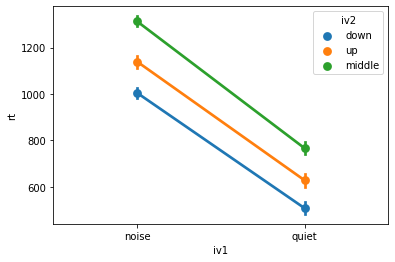

In [27]:
ax = sns.pointplot(x='iv1', y='rt', hue='iv2',data=df)